In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
train_data = pd.read_csv(r"/content/drive/MyDrive/credfraud/fraudTrain.csv")
test_data = pd.read_csv(r"/content/drive/MyDrive/credfraud/fraudTest.csv")

In [11]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [12]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

plotting and comparing frequency of fraud occurence


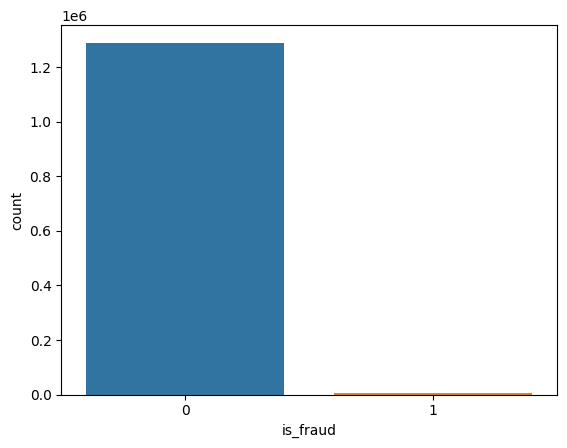

In [13]:
plt.figure()
sns.countplot(x='is_fraud', data = train_data)
plt.show()

In [14]:
train_data['is_fraud'].count()

1296675

Data_prep is a function to encode string data into numerical values[eg: gender and category] using either lambda function or 'get_dummies' as per situation. It also calculates more relevant info the model needs such as age from 'dob' and 'trans_date_trans_time'.

In [15]:
def data_prep(D):


  D['gender'] = D['gender'].apply(lambda x: 1 if x=='M' else 0)
  D['gender'] = D['gender'].astype(int)

  D['trans_date_trans_time'] = pd.to_datetime(D['trans_date_trans_time'])
  D['trans_date'] = D['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
  D['trans_date'] = pd.to_datetime(D['trans_date'])
  D['dob'] = pd.to_datetime(D['dob'])

  D['age'] = (D['trans_date'] - D['dob']).dt.days //365

  D = pd.get_dummies(D, columns=['category'])
  D = D.drop(columns=['city', 'trans_date_trans_time', 'state', 'job',
               'merch_lat', 'merch_long', 'lat', 'long', 'dob','trans_date',
               'merchant', 'first', 'last', 'street', 'zip','unix_time',
               'Unnamed: 0', 'trans_num', 'cc_num'])

  return D

In [16]:
train_data_fin = data_prep(train_data.copy())
test_data_fin = data_prep(test_data.copy())

In [17]:
x_train = train_data_fin.drop('is_fraud', axis=1)
x_test = test_data_fin.drop('is_fraud', axis=1)

y_train = train_data_fin['is_fraud']
y_test = test_data_fin['is_fraud']

Standardizing the data.

In [18]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Logisitc regression model.

In [19]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

y_log_pred = log_model.predict(x_test)

print(classification_report(y_test, y_log_pred))

log_accuracy = accuracy_score(y_test, y_log_pred)
print('accuracy = ',log_accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

accuracy =  0.9955517086873042


Correlation Heatmap

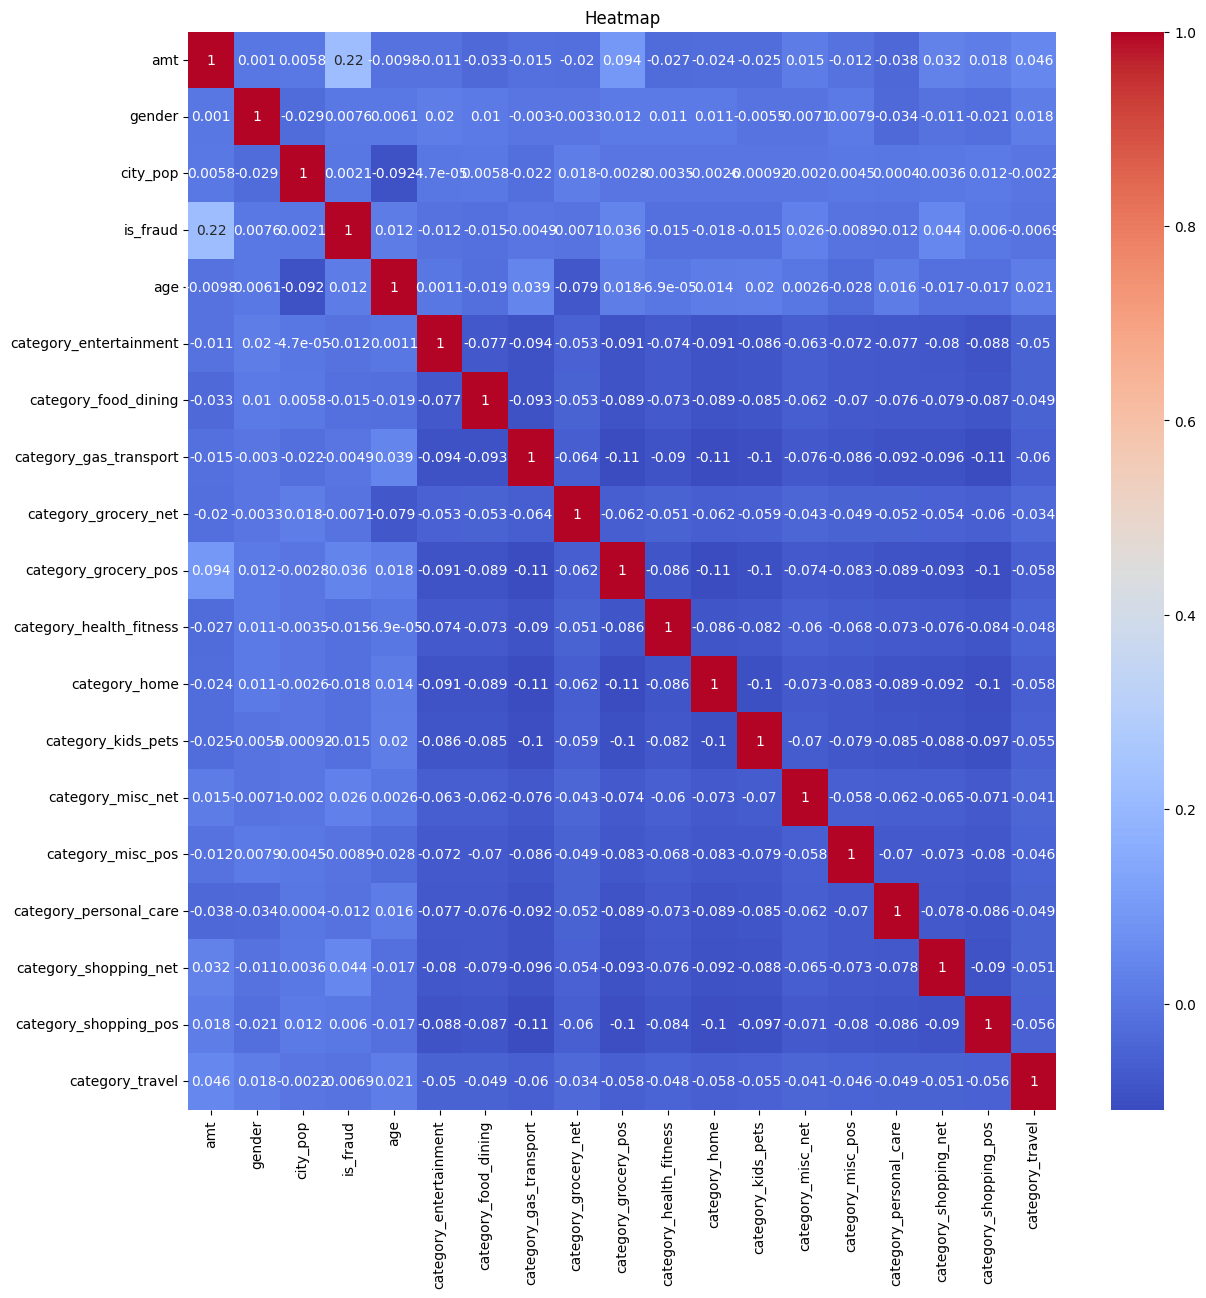

In [20]:
plt.figure(figsize=(14,14))
correlation_matrix = train_data_fin.corr()
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot=True)
plt.title('Heatmap')
plt.show()

Decision Tree Model

In [21]:
tree_mod = DecisionTreeClassifier()
tree_mod.fit(x_train, y_train)

y_tree_pred = tree_mod.predict(x_test)

tree_accuracy = accuracy_score(y_test, y_tree_pred)
print('accuracy: ', tree_accuracy)
print(classification_report(y_test, y_tree_pred))

accuracy:  0.9967069688097762
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.57      0.61      0.59      2145

    accuracy                           1.00    555719
   macro avg       0.78      0.81      0.79    555719
weighted avg       1.00      1.00      1.00    555719

